# Importing Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -------------------------------- ------- 6.6/8.0 MB 36.6 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 29.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 62.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 76.3 MB/s eta 0:00:00


In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.12.23-py2.py3-none-any.whl.metadata (876 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (

# Data loading and preprocessing

In [1]:
# Step 1: Data Preparation
# Define paths to the RAF_DB dataset
train_dir = "C:/Users/Yuvraj/Downloads/RAF_DB_dataset/DATASET/train"
val_dir = "C:/Users/Yuvraj/Downloads/RAF_DB_dataset/DATASET/test"

In [4]:
# Image dimensions and batch size
img_size = (224, 224)
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [5]:
# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
)

Found 12270 images belonging to 7 classes.
Found 3068 images belonging to 7 classes.


# Defining the pre-trained model of MobileNetV2

In [6]:
# Step 2: Load Pretrained MobileNetV2 Model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))


# Freezing the all neuron layers of the pre-trained model

In [7]:
# Freeze the base model layers
base_model.trainable = False

# Adding custom layers in the model

In [8]:
# Step 3: Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling layer
x = Dense(256, activation="relu")(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(train_generator.num_classes, activation="softmax")(x)


# Defining our custom pre-trained model 

In [9]:
# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compiling the model

In [10]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Training the model

In [11]:
# Step 4: Train the Model
epochs = 100

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size,
    verbose=1,
)

c:\Users\Yuvraj\Downloads\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
280/383 ━━━━━━━━━━━━━━━━━━━━ 1:36 933ms/step - accuracy: 0.3669 - loss: 1.7734

KeyboardInterrupt: 

# Unfreeze Base Model for Fine-Tuning

In [11]:

base_model.trainable = True

# Recompile with a lower learning rate

In [12]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss="categorical_crossentropy", metrics=["accuracy"])

# Training the model

In [13]:
# Fine-tune the model
fine_tune_epochs = 100
history_fine_tune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=fine_tune_epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size,
    verbose=1,
)



Epoch 1/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 902s 2s/step - accuracy: 0.3138 - loss: 1.7502 - val_accuracy: 0.4977 - val_loss: 1.3988
Epoch 2/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.5625 - loss: 1.2449 - val_accuracy: 0.4974 - val_loss: 1.4036
Epoch 3/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 873s 2s/step - accuracy: 0.4650 - loss: 1.4533 - val_accuracy: 0.4951 - val_loss: 1.5088
Epoch 4/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.4688 - loss: 1.4169 - val_accuracy: 0.4967 - val_loss: 1.5086
Epoch 5/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 858s 2s/step - accuracy: 0.4889 - loss: 1.3720 - val_accuracy: 0.5201 - val_loss: 1.4669
Epoch 6/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.5938 - loss: 1.2000 - val_accuracy: 0.5194 - val_loss: 1.4685
Epoch 7/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 864s 2s/step - accuracy: 0.5150 - loss: 1.3277 - val_accuracy: 0.5424 - val_loss: 1.3595
Epoch 8/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.5000 - loss: 1.20

# Evaluate the Model

In [12]:
from tensorflow.keras.models import load_model


In [13]:
model = load_model('mobilenetv2_rafdb.keras')

c:\Users\Yuvraj\Downloads\anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 162 variables whereas the saved optimizer has 322 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:

test_loss,test_accuracy = model.evaluate(val_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 626ms/step - accuracy: 0.7745 - loss: 0.6254
Test Loss: 0.6769106984138489
Test Accuracy: 75.72%


# Visualize Training History

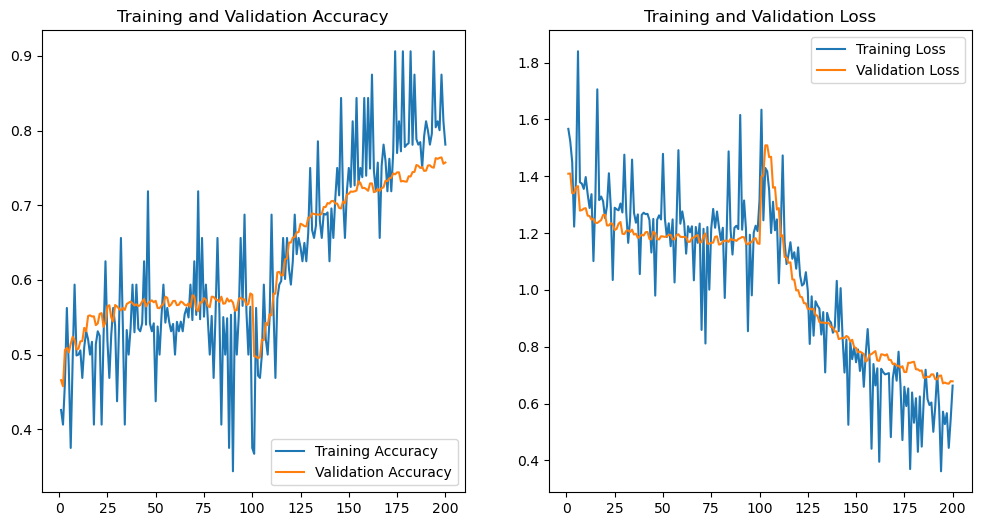

In [29]:

def plot_training_history(history, fine_tune_history=None):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    if fine_tune_history:
        acc += fine_tune_history.history['accuracy']
        val_acc += fine_tune_history.history['val_accuracy']
        loss += fine_tune_history.history['loss']
        val_loss += fine_tune_history.history['val_loss']

    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label="Training Accuracy")
    plt.plot(epochs_range, val_acc, label="Validation Accuracy")
    plt.legend(loc="lower right")
    plt.title("Training and Validation Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label="Training Loss")
    plt.plot(epochs_range, val_loss, label="Validation Loss")
    plt.legend(loc="upper right")
    plt.title("Training and Validation Loss")
    plt.show()

plot_training_history(history, history_fine_tune)


# Save the Model

In [16]:

model.save("mobilenetv2_rafdb.keras")
print("Model saved as 'mobilenetv2_rafdb.h5'")


Model saved as 'mobilenetv2_rafdb.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


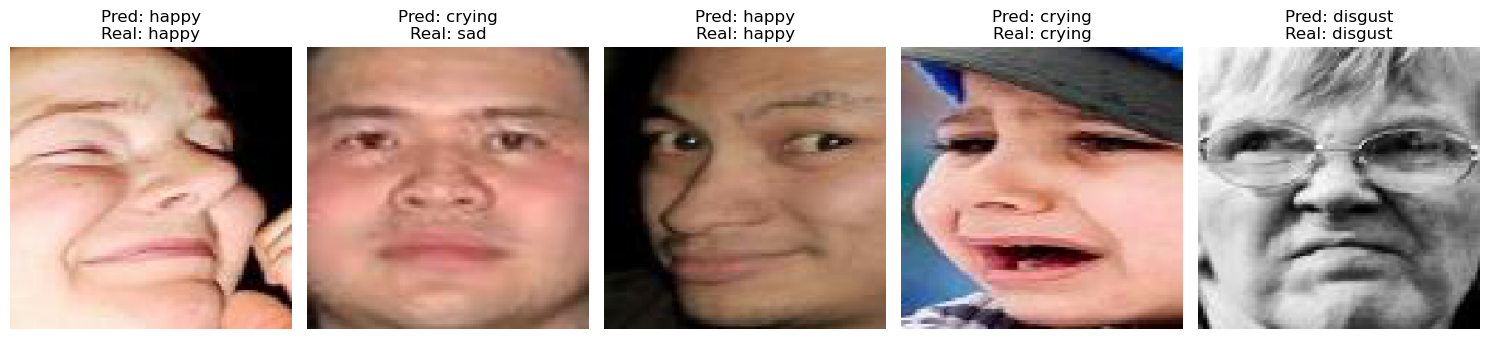

In [33]:
import matplotlib.pyplot as plt
import numpy as np


test_images, test_labels = next(iter(val_generator))  # Fetch one batch


predicted_probs = model.predict(test_images)
predicted_labels = np.argmax(predicted_probs, axis=1)  # Get class indices
real_labels = np.argmax(test_labels, axis=1)           # Get real class indices


class_indices = val_generator.class_indices
classes = {v: k for k, v in class_indices.items()}  # Reverse the dictionary for decoding


num_images_to_display = 5
plt.figure(figsize=(15, 10))

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(test_images[i])
    plt.axis('off')
    predicted_class = classes[predicted_labels[i]]
    real_class = classes[real_labels[i]]
    plt.title(f"Pred: {predicted_class}\nReal: {real_class}", fontsize=12)

plt.tight_layout()
plt.show()
